In [1]:
#librerías para Análisis
import pandas as pd
import numpy as np
import plotly as pltl
import seaborn as sns
#librerías para Machine Learning
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
#Librería para exportar/importar el modelo generado
import joblib
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
#ingesta de datos para análisis
data_train = pd.read_excel('./bike_train.xlsx')
data_test_v = pd.read_excel('./bike_test.xlsx')

In [3]:
#Verificar el tipo de datos leidos
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     11999 non-null  int64         
 1   dteday      11999 non-null  datetime64[ns]
 2   season      11999 non-null  int64         
 3   yr          11999 non-null  int64         
 4   mnth        11999 non-null  int64         
 5   hr          11999 non-null  int64         
 6   holiday     11999 non-null  int64         
 7   weekday     11999 non-null  int64         
 8   workingday  11999 non-null  int64         
 9   weathersit  11999 non-null  int64         
 10  temp        11999 non-null  float64       
 11  atemp       11999 non-null  float64       
 12  hum         11999 non-null  float64       
 13  windspeed   11999 non-null  float64       
 14  casual      11999 non-null  int64         
 15  registered  11999 non-null  int64         
 16  cnt         11999 non-

In [4]:
#Verificar las metricas
data_train.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000
mean,6000.000000,2.210684,0.279523,5.530294,11.556630,0.027752,3.009334,0.684057,1.435036,0.465704,0.448888,0.625770,0.196433,30.049837,128.545129,158.594966
std,3463.957275,1.088798,0.448784,3.433005,6.911891,0.164269,2.005264,0.464910,0.650894,0.188576,0.169633,0.200637,0.125394,43.596915,124.692750,151.392952
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3000.500000,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.303000,0.470000,0.104500,3.000000,29.000000,34.000000
50%,6000.000000,2.000000,0.000000,5.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.460000,0.454500,0.620000,0.194000,13.000000,98.000000,118.000000
75%,8999.500000,3.000000,1.000000,8.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.620000,0.590900,0.790000,0.283600,39.000000,185.000000,232.000000
max,11999.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.000000,1.000000,0.850700,367.000000,770.000000,957.000000


In [5]:
data_test_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5380 entries, 0 to 5379
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     5380 non-null   int64         
 1   dteday      5380 non-null   datetime64[ns]
 2   season      5380 non-null   int64         
 3   yr          5380 non-null   int64         
 4   mnth        5380 non-null   int64         
 5   hr          5380 non-null   int64         
 6   holiday     5380 non-null   int64         
 7   weekday     5380 non-null   int64         
 8   workingday  5380 non-null   int64         
 9   weathersit  5380 non-null   int64         
 10  temp        5380 non-null   float64       
 11  atemp       5380 non-null   float64       
 12  hum         5380 non-null   float64       
 13  windspeed   5380 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 588.6 KB


In [4]:
#Eliminar features innecesarias
data_train_clean = data_train.drop(['instant','dteday','casual','registered'], axis=1)
data_test_clean = data_test_v.drop(['instant','dteday'], axis=1)

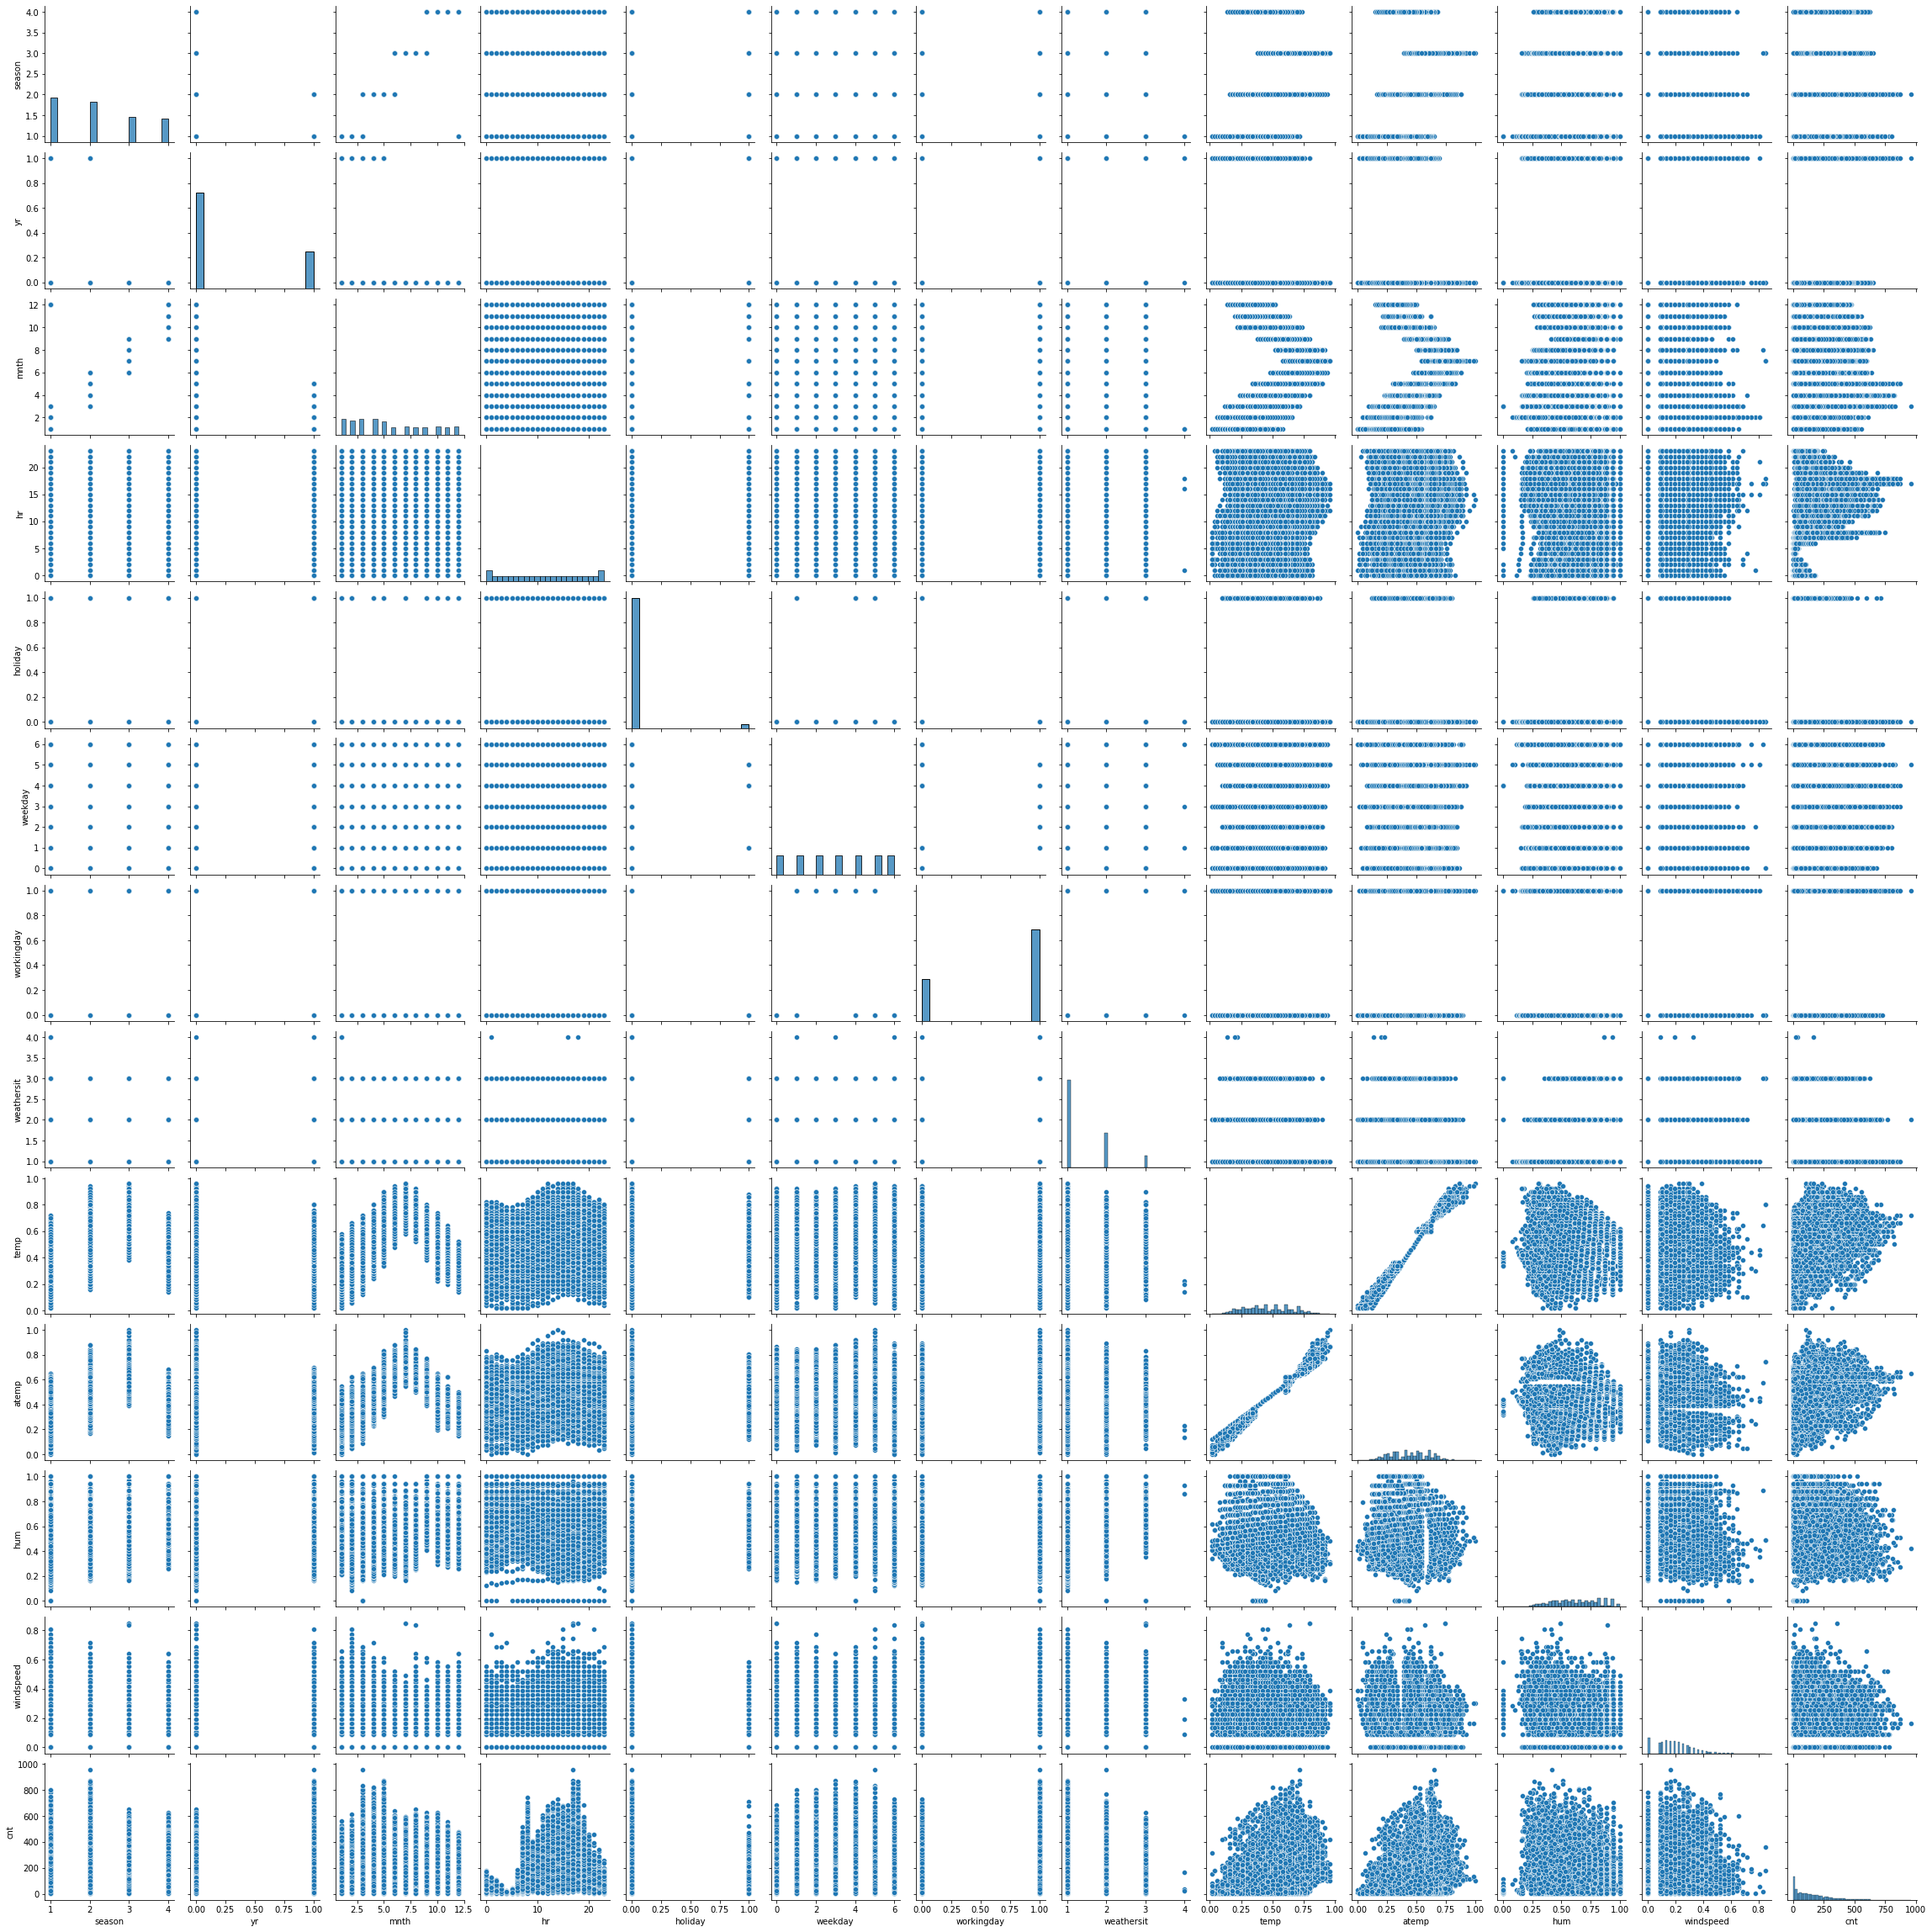

In [32]:
#hacemos un pairplot para ver como se relacionan las features
sns.pairplot(data_train_clean)

In [5]:
#procedemos a dividir la tabla limpia (data_train_clean) para entrenar y probar el modelo XGBoost
data_train, data_test = train_test_split(data_train_clean, test_size=.3, random_state=1999)

In [6]:
#para funcionar el modelo XGBoost necesita que se transforme los dataset a DMatrix, transformamos los que dividimos para entrenar el modelo y el que separamos para predecir
data_train_mat = xgb.DMatrix(data_train.drop("cnt", 1), label=data_train["cnt"])
data_test_mat = xgb.DMatrix(data_test.drop("cnt", 1), label=data_test["cnt"])
data_test_v_mat =  xgb.DMatrix(data_test_clean)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_13428\1228605246.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_train_mat = xgb.DMatrix(data_train.drop("cnt", 1), label=data_train["cnt"])
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_13428\1228605246.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_test_mat = xgb.DMatrix(data_test.drop("cnt", 1), label=data_test["cnt"])


In [8]:
#Verificamos el tipo de objeto
data_train_mat

In [23]:
#definimos los parametros y las rondas de entrenamiento
#prueba anterior reg:linear
parametros = {"booster":"gbtree", "max_depth": 6, "eta": 0.3, "objective": "reg:squarederror", "nthread":3}
rondas = 20

In [19]:
#Definimos el parámetro evaluación
evaluacion = [(data_test_mat, "eval"), (data_train_mat, "train")]

In [24]:
modelo = xgb.train(parametros, data_train_mat, rondas, evaluacion)

[0]	eval-rmse:170.54793	train-rmse:163.19827
[1]	eval-rmse:130.75331	train-rmse:125.36116
[2]	eval-rmse:104.35346	train-rmse:98.69067
[3]	eval-rmse:87.61176	train-rmse:81.70531
[4]	eval-rmse:78.02824	train-rmse:71.69261
[5]	eval-rmse:67.64278	train-rmse:61.12703
[6]	eval-rmse:61.67707	train-rmse:55.52584
[7]	eval-rmse:58.38424	train-rmse:51.74839
[8]	eval-rmse:52.92761	train-rmse:45.92313
[9]	eval-rmse:51.00143	train-rmse:43.80950
[10]	eval-rmse:48.62132	train-rmse:41.41424
[11]	eval-rmse:47.58776	train-rmse:40.10039
[12]	eval-rmse:46.55539	train-rmse:38.96431
[13]	eval-rmse:45.06002	train-rmse:37.29931
[14]	eval-rmse:44.27619	train-rmse:36.46374
[15]	eval-rmse:43.95332	train-rmse:35.87404
[16]	eval-rmse:43.29770	train-rmse:35.14429
[17]	eval-rmse:43.12195	train-rmse:34.74022
[18]	eval-rmse:42.68705	train-rmse:34.27101
[19]	eval-rmse:42.58595	train-rmse:34.06080


In [12]:
#Verificamos el objeto modelo
modelo

In [25]:
#Guardamos el modelo
joblib.dump(modelo, 'modXGBoost_v3.pkl')

['modXGBoost_v3.pkl']

In [11]:
#Probamos el modelo con la base de datos test proporcionada por el Mentor Jonathan
prediccion_t = modelo.predict(data_test_mat)

In [26]:
dtest = np.array(data_test['cnt'], dtype=int)
pred_t = np.array(prediccion_t, dtype=int)

In [16]:
dtest

array([141, 279, 174, ..., 148,  69,  72])

In [17]:
pred_t

array([ 92, 150, 179, ..., 230, 127, 100])

In [27]:
# RMSE Computation
rmse = np.sqrt(MSE(dtest, pred_t))
print("RMSE : % f" %(rmse))

RMSE :  69.530081


In [28]:
score = accuracy_score(dtest,pred_t)
print(score)

0.008333333333333333


In [44]:
data_test_clean

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2,1,5,4,0,0,0,1,0.52,0.5000,0.68,0.0896
1,2,1,5,5,0,0,0,1,0.50,0.4848,0.72,0.1045
2,2,1,5,6,0,0,0,1,0.50,0.4848,0.63,0.1343
3,2,1,5,7,0,0,0,1,0.52,0.5000,0.68,0.1940
4,2,1,5,8,0,0,0,1,0.56,0.5303,0.56,0.1642
...,...,...,...,...,...,...,...,...,...,...,...,...
5375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642
5376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642
5377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642
5378,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343


In [29]:
prediccion = modelo.predict(data_test_v_mat)

In [30]:
#Asignamos una variable con el resultado de convertir la predicción en un dataframe.
pred = pd.DataFrame(prediccion,columns={'pred'}).astype(int)

In [31]:
pred

,pred
0,17
1,17
2,51
3,91
4,193
...,...
5375,241
5376,169
5377,133
5378,96


In [23]:
pred.to_csv('Nippur7.csv', index = False )

Código experimental

In [45]:
def metricas(objetivo, prediccion):
    matriz_conf = confusion_matrix(objetivo, prediccion)
    score = accuracy_score(objetivo, prediccion)
    reporte = classification_report(objetivo, prediccion)
    metricas = [matriz_conf, score, reporte]
    return(metricas)

In [46]:
metrics = metricas(dtest,pred_t)
[print(i) for i in metrics]

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [13  2  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
0.006666666666666667
              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         0
          -2       0.00      0.00      0.00         0
           1       0.00      0.00      0.00        41
           2       0.00      0.00      0.00        55
           3       0.00      0.00      0.00        65
           4       0.00      0.00      0.00        50
           5       0.00      0.00      0.00        56
           6       0.00      0.00      0.00        58
           7       0.00      0.00      0.00        29
           8       0.00      0.00      0.00        44
           9       0.05      0.07      0.06        28
          10       0.00      0.00      0.00        29
          11       0.00      0.00      0.00        29
          12       0.00      0.00      0.00        20
          13

c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall 

[None, None, None]